### 기온에 따른 지면 온도를 예측해보기(코랩에서 실행)

In [4]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data/temps.csv", encoding="ms949")
df

,지점,지점명,일시,기온(°C),지면온도(°C)
0,232,천안,2020-01-01 01:00,-8.7,-2.9
1,232,천안,2020-01-01 02:00,-7.3,-2.4
2,232,천안,2020-01-01 03:00,-6.7,-2.2
3,232,천안,2020-01-01 04:00,-6.2,-2.0
4,232,천안,2020-01-01 05:00,-5.9,-1.9
...,...,...,...,...,...
8777,232,천안,2020-12-31 19:00,-6.6,-0.6
8778,232,천안,2020-12-31 20:00,-6.4,-0.7
8779,232,천안,2020-12-31 21:00,-7.3,-1.2
8780,232,천안,2020-12-31 22:00,-9.0,-1.5


In [10]:
df["기온(°C)"].isnull().mean()

0.00034160783420633114

In [11]:
df.dropna(inplace=True)

In [12]:
x_data = df[['기온(°C)']]
y_data = df[['지면온도(°C)']]

In [13]:
x_data = torch.FloatTensor(x_data.values)
y_data = torch.FloatTensor(y_data.values)
print(x_data.shape, y_data.shape)

torch.Size([8779, 1]) torch.Size([8779, 1])


In [14]:
model = nn.Linear(1, 1)
print(model)

Linear(in_features=1, out_features=1, bias=True)


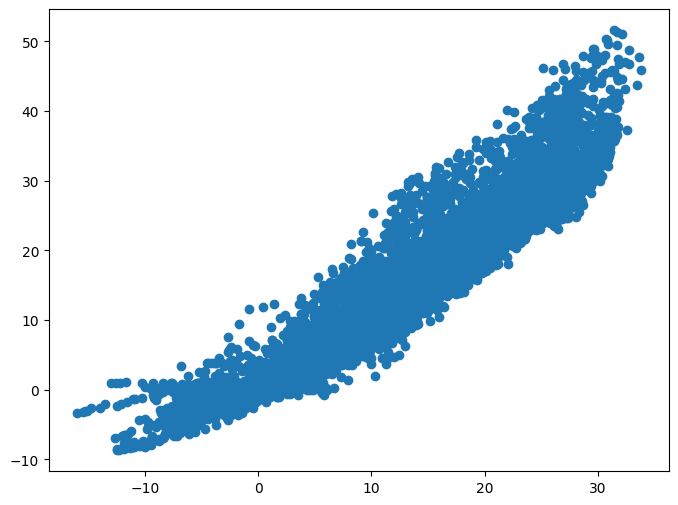

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data)

In [16]:
model = nn.Linear(1,1)

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.9781]], requires_grad=True), Parameter containing:
tensor([-0.7927], requires_grad=True)]


In [17]:
epochs = 10000

for i in range(epochs + 1):
  y_pred = model(x_data)
  loss = nn.MSELoss()(y_pred, y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if i % 100 == 0:
    print(f"Epoch: {epochs}/{epochs} Loss: {loss:.6f}")

Epoch: 10000/10000 Loss: 1169.936890
Epoch: 10000/10000 Loss: 13.743072
Epoch: 10000/10000 Loss: 13.625229
Epoch: 10000/10000 Loss: 13.525041
Epoch: 10000/10000 Loss: 13.439858
Epoch: 10000/10000 Loss: 13.367435
Epoch: 10000/10000 Loss: 13.305861
Epoch: 10000/10000 Loss: 13.253510
Epoch: 10000/10000 Loss: 13.209002
Epoch: 10000/10000 Loss: 13.171161
Epoch: 10000/10000 Loss: 13.138987
Epoch: 10000/10000 Loss: 13.111632
Epoch: 10000/10000 Loss: 13.088378
Epoch: 10000/10000 Loss: 13.068604
Epoch: 10000/10000 Loss: 13.051794
Epoch: 10000/10000 Loss: 13.037500
Epoch: 10000/10000 Loss: 13.025350
Epoch: 10000/10000 Loss: 13.015018
Epoch: 10000/10000 Loss: 13.006233
Epoch: 10000/10000 Loss: 12.998766
Epoch: 10000/10000 Loss: 12.992417
Epoch: 10000/10000 Loss: 12.987019
Epoch: 10000/10000 Loss: 12.982429
Epoch: 10000/10000 Loss: 12.978525
Epoch: 10000/10000 Loss: 12.975209
Epoch: 10000/10000 Loss: 12.972388
Epoch: 10000/10000 Loss: 12.969991
Epoch: 10000/10000 Loss: 12.967951
Epoch: 10000/10000

In [18]:
y_pred = model(x_data).detach().numpy()
y_pred

array([[-8.623497],
       [-7.103935],
       [-6.452693],
       ...,
       [-7.103935],
       [-8.949118],
       [-9.166199]], dtype=float32)

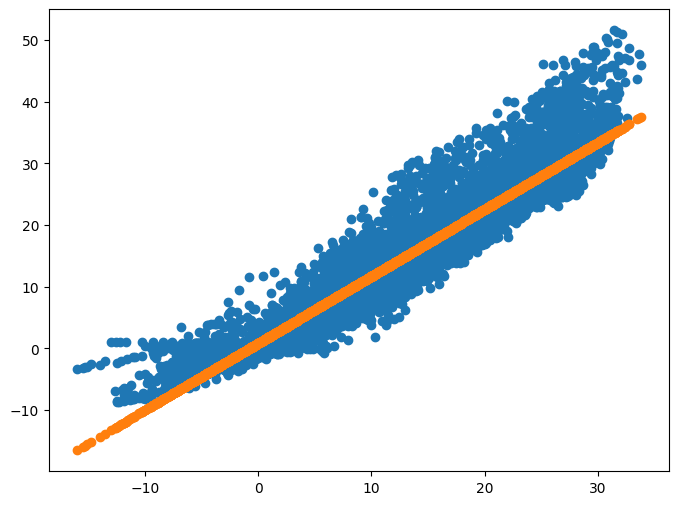

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data)
plt.scatter(x_data, y_pred)

In [20]:
result = model(torch.FloatTensor([[26]]))
result

tensor([[29.0400]], grad_fn=<AddmmBackward0>)